# Final Proyect: Bank Marketing Segmentation

Group Members: 
- Paola Barrea
- Nicolás Bierti del Rey

The increasing number of marketing campaigns over time has reduced their effect on the general public.
In addition, economic pressures and competition have led companies to invest in targeted campaigns with strict selection of contacts. This type of campaign can be improved by using Business Intelligence (BI) and Data Mining (DM) techniques.<br><br>
The data was collected from a Portuguese marketing campaign related to the subscription of bank deposits. 
The business objective is **to find a model that can explain the success of a contact, that is, if the customer signs the deposit**.<br><br>
Such model can increase campaign efficiency by identifying the main characteristics that affect success, helping in a better management of the available resources (e.g. human effort, phone calls, time) and selection of a high quality and affordable set of potential buying customers.



<br><br>
The dataset was obtained Kaggle: https://www.kaggle.com/dhirajnirne/bank-marketing

Our problem Confussion Matrix can be explain in the following way: 

- there will be clients with whom we will contact because the model has predicted that they would accept and in reality they do not buy the product (False Positive [FP], False Positives).
- there will also be clients with whom we will not contact because the model has predicted that they would not accept but in reality they would buy it (False Negative [FN], False Negatives).
- there will be clients with whom we will contact because the model has predicted that they would accept and in fact they do buy the product (True Positive [TP], True Positives).
- there will be clients that we will not contact because the model has predicted that they would not accept the offer and in reality they do not accept it (True Negative [TN], True Negatives).

# Data Acquisition

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
%matplotlib inline

#### Dicctionary: bank_marketing_data.csv

<span style='color:orange'>**Personal information**<br></span>
**age**<br>
**age group:** variable age divided in 9 groups according to the age, 1-9 = 1, 20-29 = 2 and so on<br>
**eligible:** variable base in personal information<br>
**job:** type of job <br>
**salary**<br>
**marital**<br>
**education:** level of education completed <br>
**marital-education:** combination of previous columns<br>
**targeted:** variable base in personal information. Rename: **tag**<br>
<span style='color:orange'>**Financial information**<br></span>
**default:** has unpayed credit? <br>
**balance:** remaining balance in the account <br>
**housing:** has housing loan? <br>
**loan:** has previous loan?<br>
<span style='color:orange'>**Last contact information**<br></span>
**contact:** communication type <br>
**day:** day of the month <br>
**month** <br>
**duration:** in seconds, if equal to 0 target will be 'False'. Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. <br>
**campaign:** number of contacts preformed in this campaign for this client <br>
<span style='color:orange'>**Previous campaing info**<br></span>
**pdays:** number of days pass since last contact in previous campaing, 999 equals 'no contact'. <br>
**previous:**  number of times this client was contacted before this campaign. Rename: **pcampign** <br>
**poutcome:** outcome of the previous marketing campaign<br>
<span style='color:orange'>**Target**<br></span>
**y:** has the client subscribed?, equal to 'response'<br>
**response** rename **outcome**

In [3]:
data = pd.read_csv("bank_marketing_data.csv")
data.head()

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,...,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,...,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,...,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,...,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,5,may,198,1,-1,0,unknown,no,0


In [4]:
df = data # to retain the original dataset in the data variable

In [5]:
df.rename(columns={'age group':'age_group','targeted':'tag','previous':'pcampaign','response':'outcome'},inplace=True)
df.head()

,age,age_group,eligible,job,salary,marital,education,marital-education,tag,default,...,contact,day,month,duration,campaign,pdays,pcampaign,poutcome,y,outcome
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,...,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,...,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,...,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,5,may,198,1,-1,0,unknown,no,0


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   age_group          45211 non-null  int64 
 2   eligible           45211 non-null  object
 3   job                45211 non-null  object
 4   salary             45211 non-null  int64 
 5   marital            45211 non-null  object
 6   education          45211 non-null  object
 7   marital-education  45211 non-null  object
 8   tag                45211 non-null  object
 9   default            45211 non-null  object
 10  balance            45211 non-null  int64 
 11  housing            45211 non-null  object
 12  loan               45211 non-null  object
 13  contact            45211 non-null  object
 14  day                45211 non-null  int64 
 15  month              45211 non-null  object
 16  duration           45211 non-null  int64

In [7]:
df.isnull().sum()

age                  0
age_group            0
eligible             0
job                  0
salary               0
marital              0
education            0
marital-education    0
tag                  0
default              0
balance              0
housing              0
loan                 0
contact              0
day                  0
month                0
duration             0
campaign             0
pdays                0
pcampaign            0
poutcome             0
y                    0
outcome              0
dtype: int64

No missing values found

In [8]:
df.describe()

,age,age_group,salary,balance,day,duration,campaign,pdays,pcampaign,outcome
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,3.645861,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,1.083271,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,1.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,3.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,3.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,4.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,9.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [9]:
df.columns

Index(['age', 'age_group', 'eligible', 'job', 'salary', 'marital', 'education',
       'marital-education', 'tag', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'pcampaign',
       'poutcome', 'y', 'outcome'],
      dtype='object')

After visualizing


In [10]:
df.groupby(['age_group','eligible']).agg({'eligible':'count'})

,,eligible
age_group,eligible,
1,N,47
2,Y,5226
3,Y,18089
4,Y,11655
5,Y,8410
6,N,1230
7,N,424
8,N,121
9,N,9


Only a certain group of people are eligible to be called. This corresponds to people ranging from 20 to 59 years old.

In [11]:
df.loc[df['salary']==0]

,age,age_group,eligible,job,salary,marital,education,marital-education,tag,default,...,contact,day,month,duration,campaign,pdays,pcampaign,poutcome,y,outcome
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,5,may,198,1,-1,0,unknown,no,0
216,47,4,Y,unknown,0,married,unknown,married-unknown,no,no,...,unknown,5,may,338,2,-1,0,unknown,no,0
354,59,5,Y,unknown,0,divorced,unknown,divorced-unknown,no,no,...,unknown,5,may,347,3,-1,0,unknown,no,0
876,37,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,7,may,131,1,-1,0,unknown,no,0
1072,29,2,Y,unknown,0,single,primary,single-primary,yes,no,...,unknown,7,may,50,2,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44714,45,4,Y,unknown,0,married,tertiary,married-tertiary,yes,no,...,cellular,7,sep,314,1,-1,0,unknown,yes,1
44742,64,6,N,unknown,0,married,unknown,married-unknown,no,no,...,telephone,9,sep,378,4,-1,0,unknown,no,0
44970,28,2,Y,unknown,0,single,unknown,single-unknown,no,no,...,cellular,11,oct,450,1,231,1,success,yes,1
45141,77,7,N,unknown,0,married,unknown,married-unknown,no,no,...,telephone,8,nov,207,1,185,3,success,no,0


There are people whose salary is 0 and they correspond to unknown job

In [12]:
df.groupby(['poutcome','y']).agg({'y':'count'})

y
poutcome y         
failure  no    4283
         yes    618
other    no    1533
         yes    307
success  no     533
         yes    978
unknown  no   33573
         yes   3386

In [13]:
df.loc[df['tag']=='no']

,age,age_group,eligible,job,salary,marital,education,marital-education,tag,default,...,contact,day,month,duration,campaign,pdays,pcampaign,poutcome,y,outcome
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,...,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,5,may,198,1,-1,0,unknown,no,0
6,28,2,Y,management,100000,single,tertiary,single-tertiary,no,no,...,unknown,5,may,217,1,-1,0,unknown,no,0
7,42,4,Y,entrepreneur,120000,divorced,tertiary,divorced-tertiary,no,yes,...,unknown,5,may,380,1,-1,0,unknown,no,0
13,58,5,Y,technician,60000,married,unknown,married-unknown,no,no,...,unknown,5,may,71,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45186,59,5,Y,unknown,0,married,unknown,married-unknown,no,no,...,cellular,16,nov,280,1,104,2,failure,no,0
45191,75,7,N,retired,55000,divorced,tertiary,divorced-tertiary,no,no,...,cellular,16,nov,262,1,183,1,failure,yes,1
45192,29,2,Y,management,100000,single,tertiary,single-tertiary,no,no,...,cellular,16,nov,238,1,-1,0,unknown,yes,1
45193,28,2,Y,self-employed,60000,single,tertiary,single-tertiary,no,no,...,cellular,16,nov,449,2,33,4,success,yes,1


In [14]:
df.groupby(['marital-education','tag']).agg({'tag':'count'})

,,tag
marital-education,tag,
divorced-primary,yes,752
divorced-secondary,yes,2815
divorced-tertiary,no,1471
divorced-unknown,no,169
married-primary,yes,5246
married-secondary,yes,13770
married-tertiary,yes,7038
married-unknown,no,1160
single-primary,yes,853


People targeted as "no" belong to certain categories of the combination of marital and education varibble.

In [15]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

There are three categories in education, tertiary indicating post-secundary education. The World Bank, for example, defines tertiary education as including universities as well as trade schools and colleges.

### Duplicates

We check for duplicated rows

In [16]:
data_dup = df[df.duplicated(keep='last')]
data_dup.shape

(0, 23)

No duplicated found

## Univariate Analisys

In [17]:
num_var=df.select_dtypes(include=np.number).columns.to_list()
cat_var=df.select_dtypes(include=object).columns.to_list()

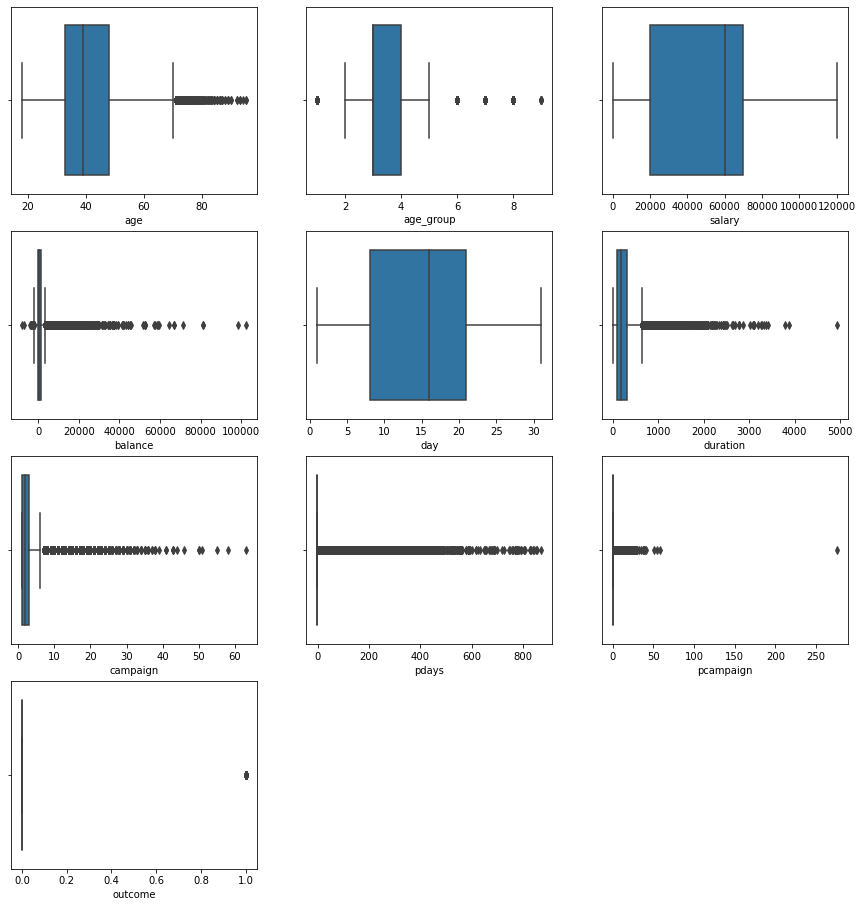

In [18]:
i=1
plt.figure(figsize=(15,20))
for j in num_var:
    plt.subplot(5,3,i)
    sns.boxplot(data=df,x=j)
    i+=1

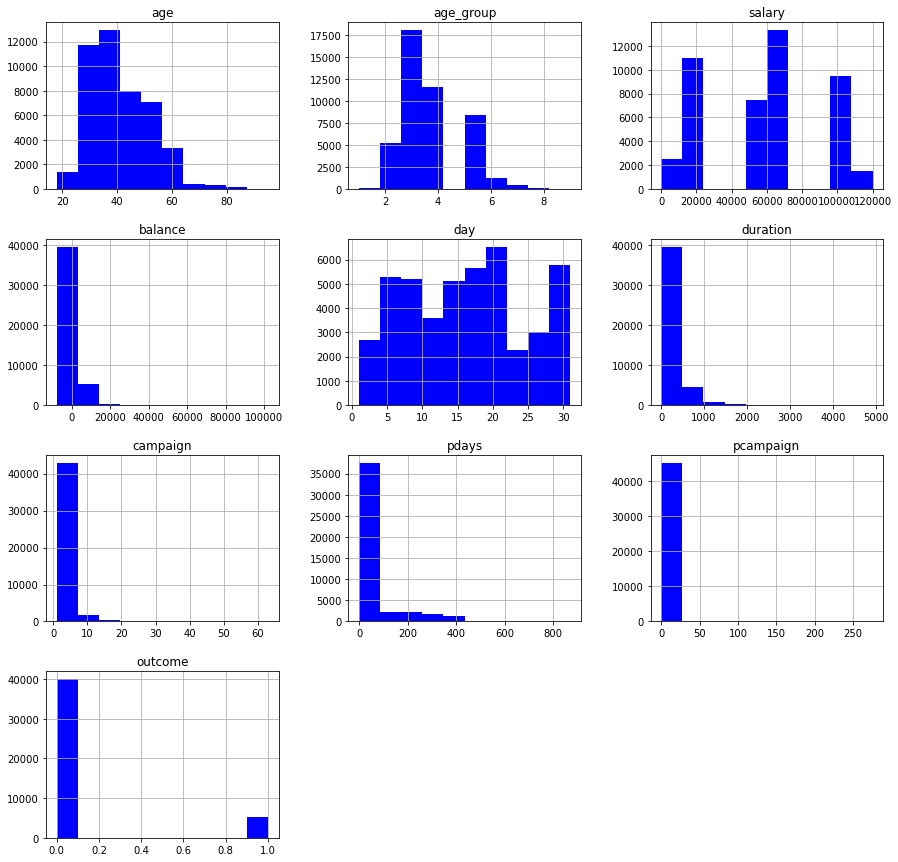

In [19]:
df.hist(figsize=(15,15),color='blue')
plt.show()

## Bivariate Analysis

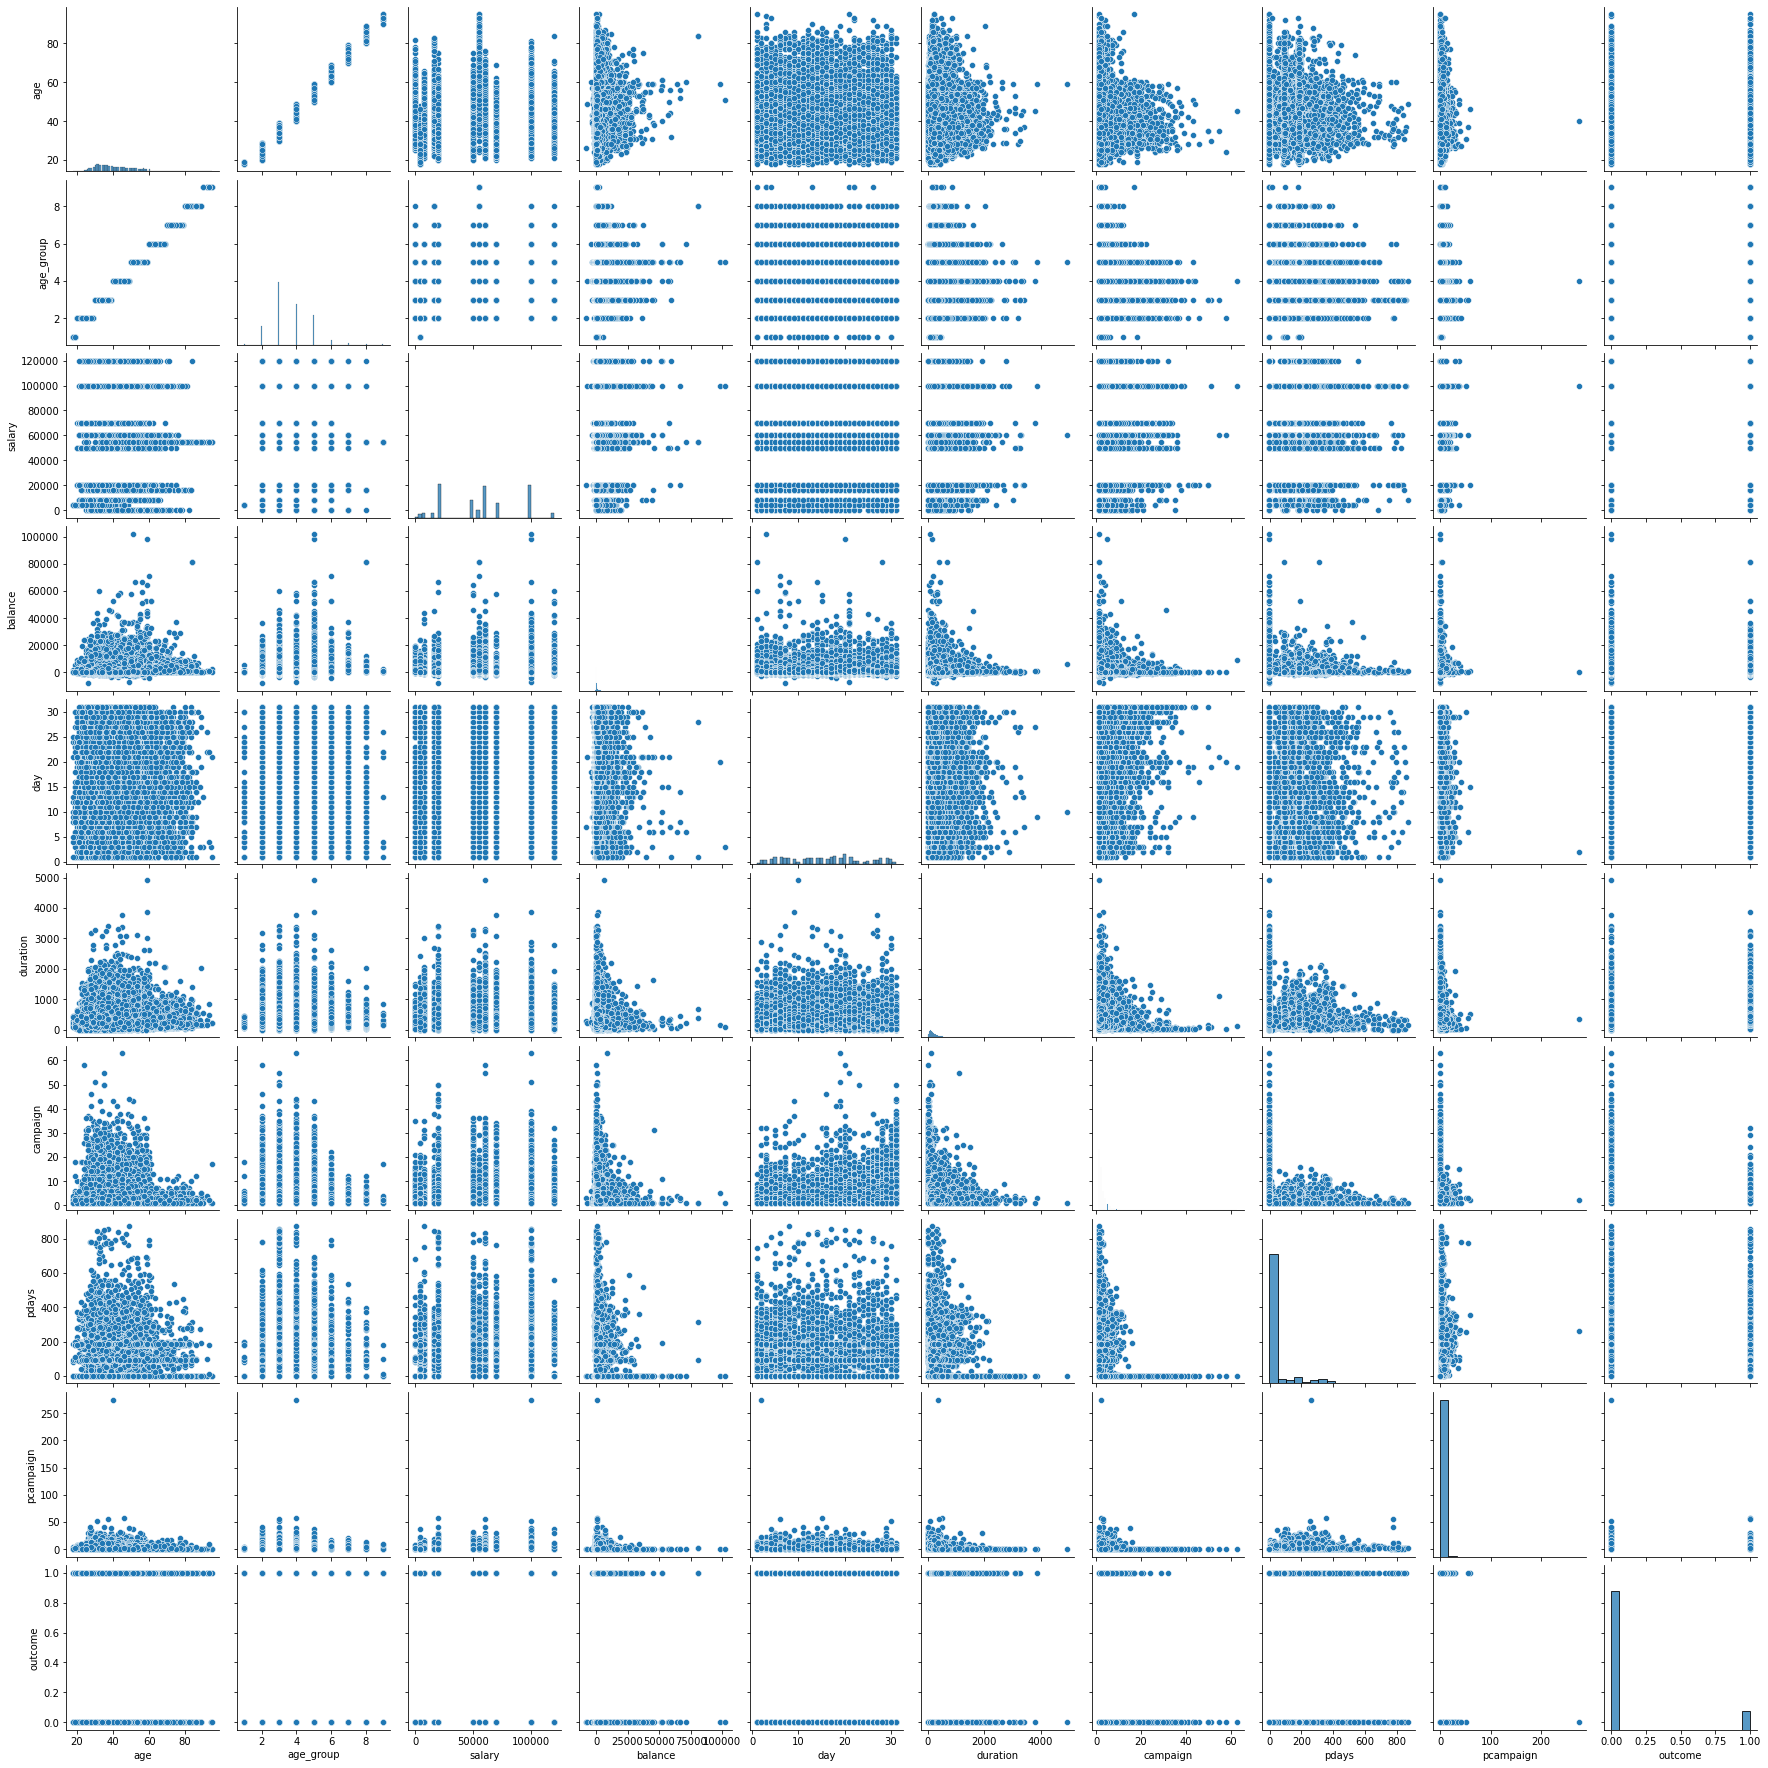

In [20]:
sns.pairplot(data=df)

In [21]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


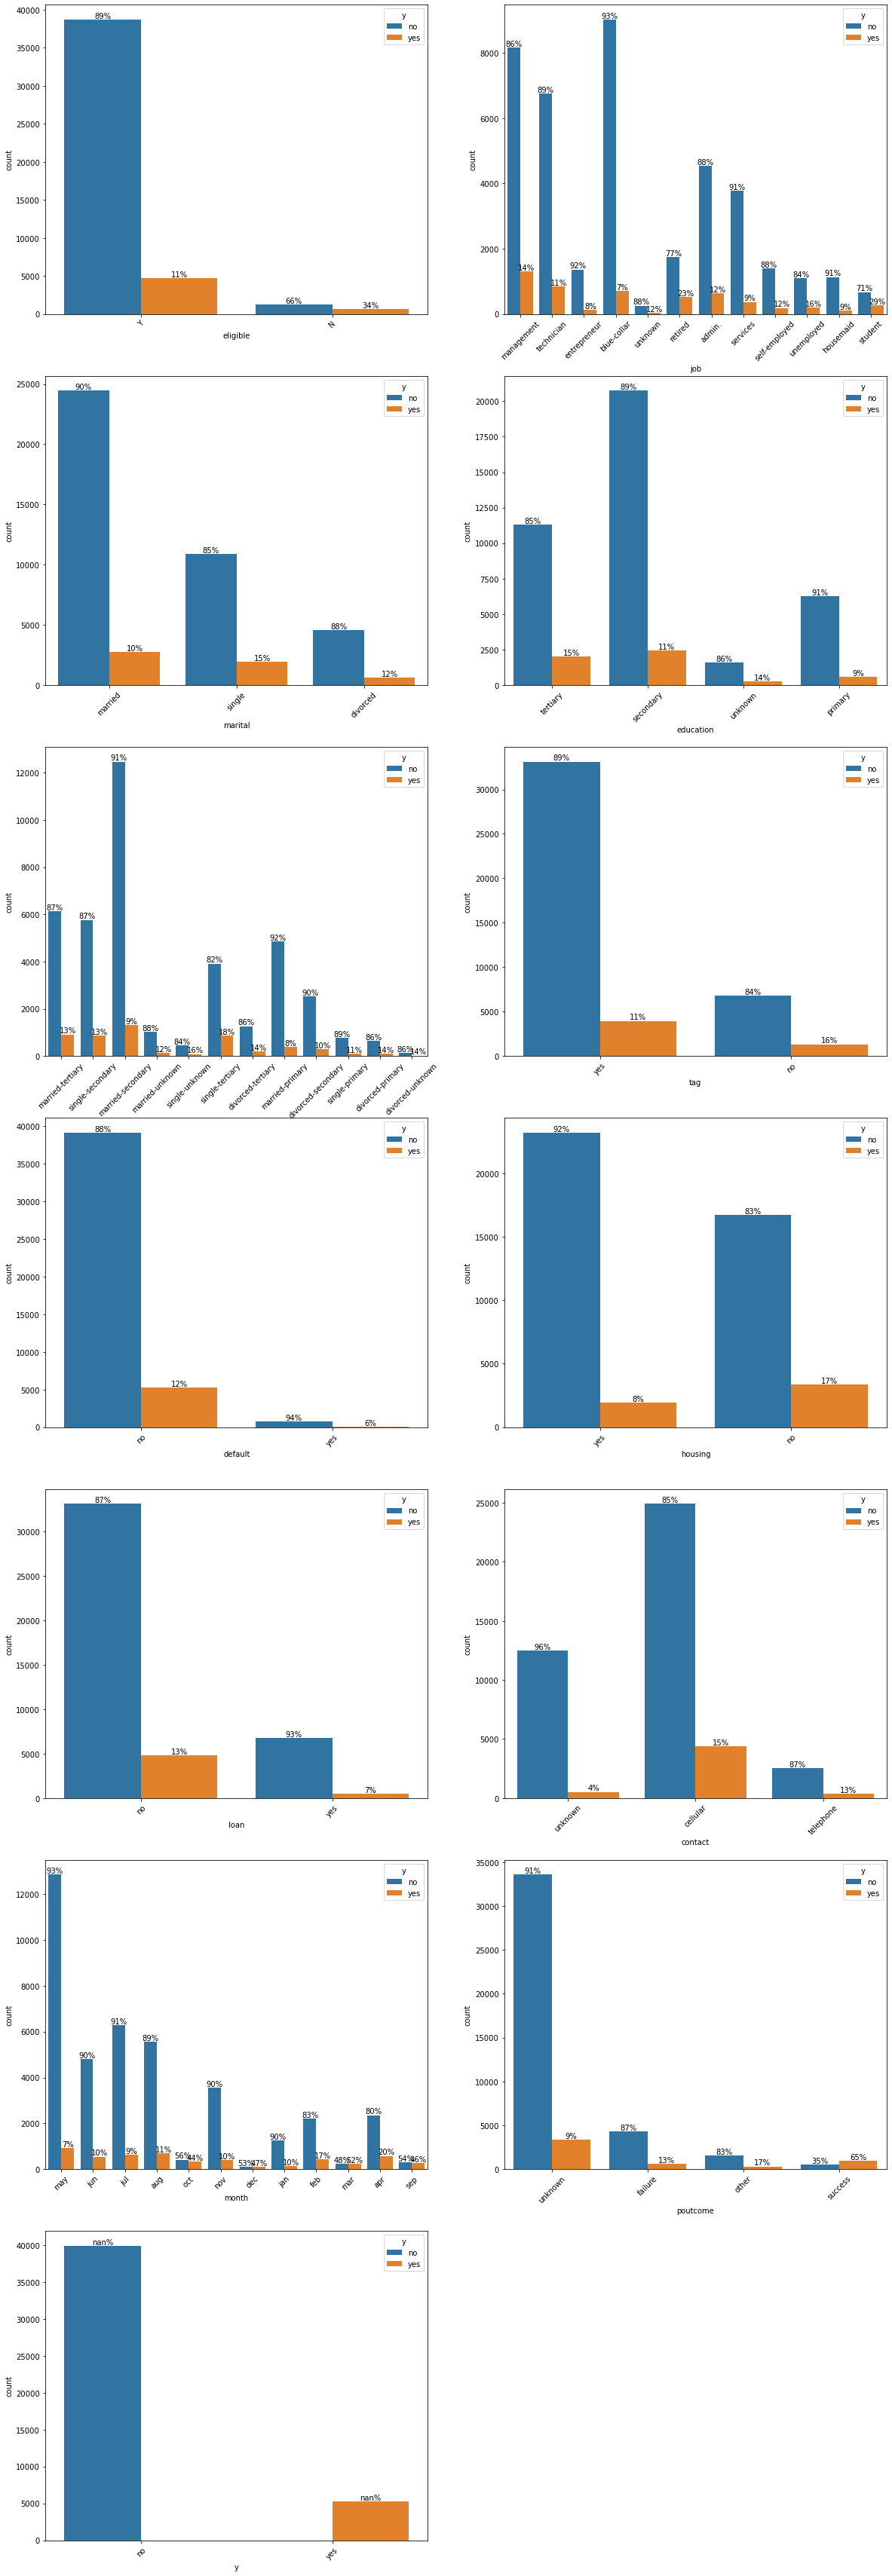

In [22]:
i=1
plt.figure(figsize=(20,80))
for col in cat_var:
    plt.subplot(9,2,i)
    ax=sns.countplot(data=df,x=col,hue='y')
    barPerc(df=df,xVar=col,ax=ax)
    plt.xticks(rotation=45)
    i+=1;

In [23]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

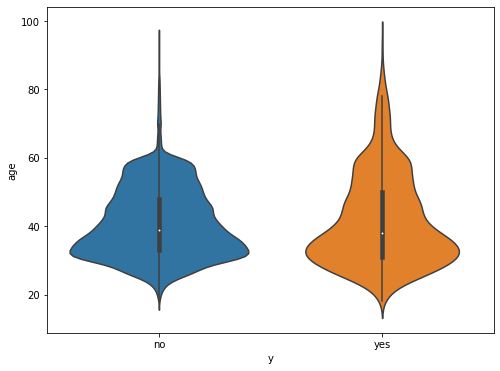

In [24]:
#violin plot for age
sns.violinplot(x="y", y="age", data=df, size=8)
plt.show();

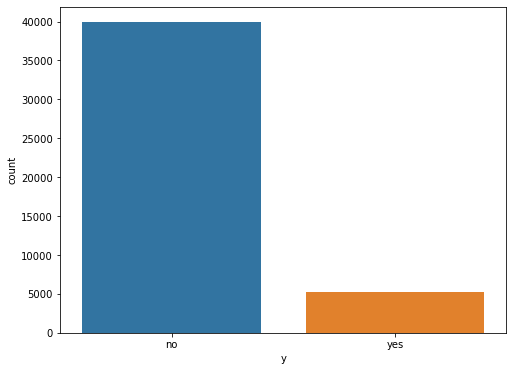

In [25]:
# count plot for deposit
#the dataset is clearly not balanced
sns.countplot(data=df,x=df['y']);

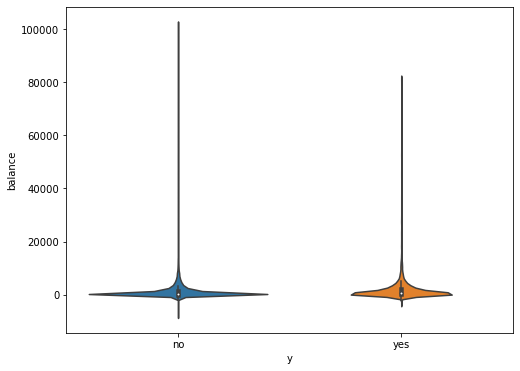

In [26]:
#violin plot for balance
sns.violinplot(x="y", y="balance", data=df, size=8)
plt.show()

In [27]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

<AxesSubplot:xlabel='poutcome'>

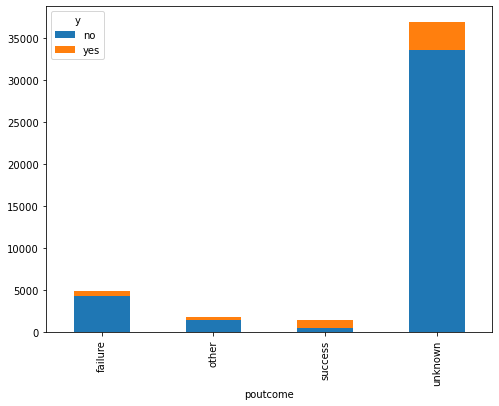

In [28]:
types = df.groupby("poutcome")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

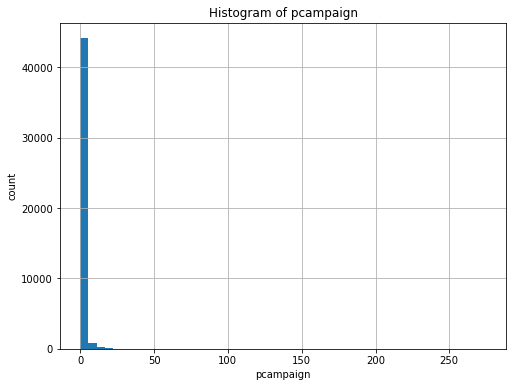

In [29]:
#histogram of previous
df['pcampaign'].hist(bins=50)
plt.title('Histogram of pcampaign')
plt.ylabel('count')
plt.xlabel('pcampaign');
plt.show()

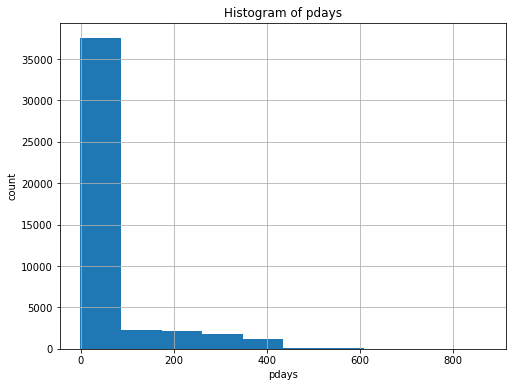

In [30]:
#histogram of pdays
df['pdays'].hist()
plt.title('Histogram of pdays')
plt.ylabel('count')
plt.xlabel('pdays');
plt.show()

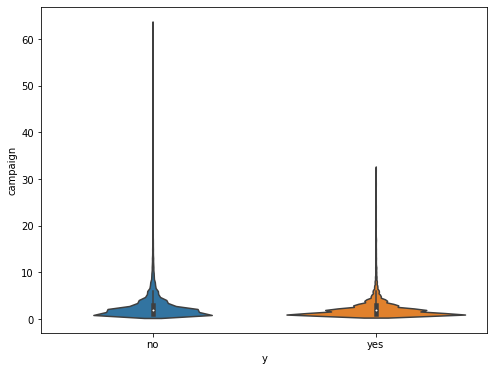

In [31]:
#violin plot for campaign
sns.violinplot(x="y", y="campaign", data=df, size=8)
plt.show()

<AxesSubplot:xlabel='month'>

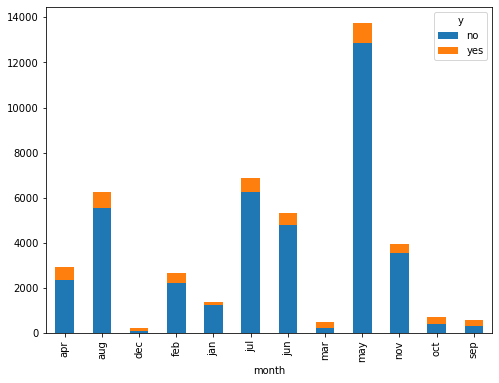

In [32]:
#bar chart for month
types = df.groupby("month")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<AxesSubplot:xlabel='day'>

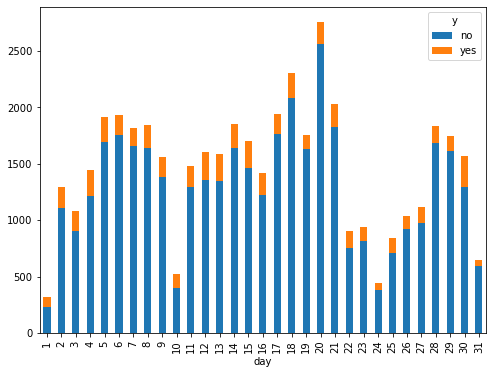

In [33]:
# group by days to display bar chart
types = df.groupby("day")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<AxesSubplot:xlabel='contact'>

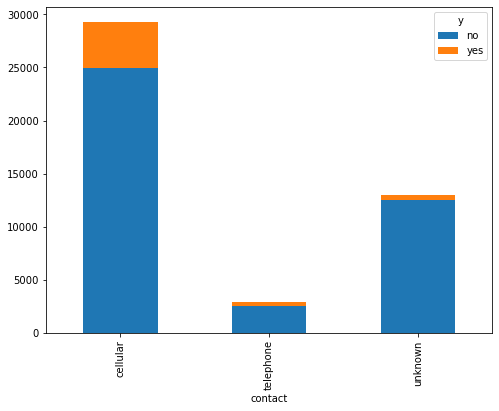

In [34]:
# group by contact to display bar chart
types = df.groupby("contact")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<AxesSubplot:xlabel='loan'>

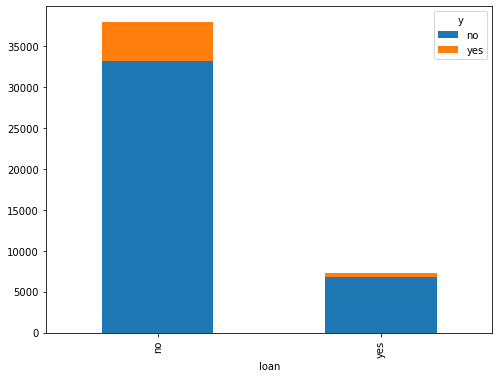

In [35]:
# group by loan to display bar chart
types = df.groupby("loan")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<AxesSubplot:xlabel='marital'>

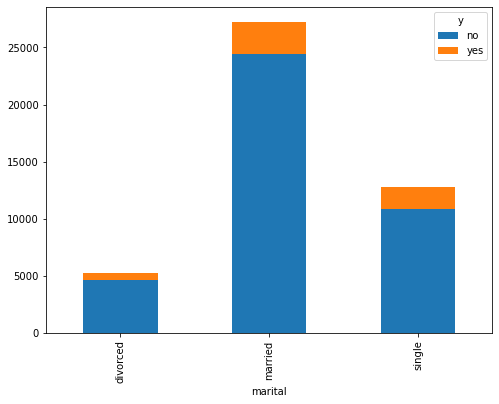

In [36]:
# group by marital to display bar chart
types = df.groupby("marital")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<AxesSubplot:xlabel='housing'>

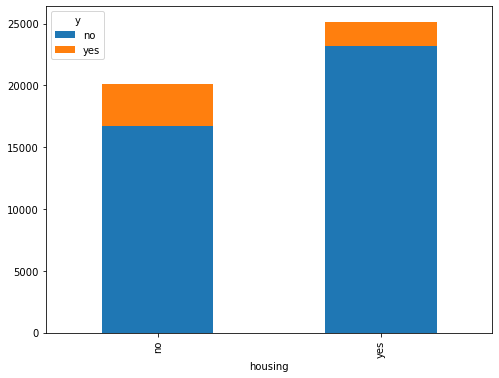

In [37]:
# group by housing to display bar chart
types = df.groupby("housing")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Housing : Whether the client has already got any housing loan from bank? Apparently clients who do not already have housing loan tend to subscribe to deposit more.

<AxesSubplot:xlabel='default'>

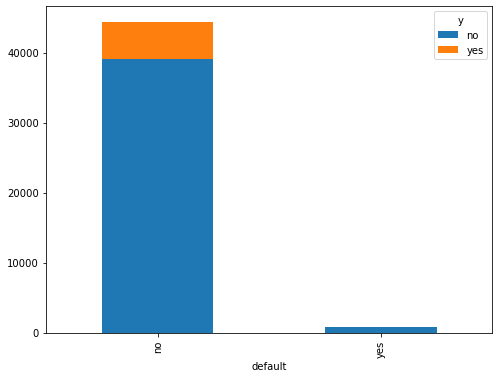

In [38]:
# group by default to display bar chart
types = df.groupby("default")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<AxesSubplot:xlabel='job'>

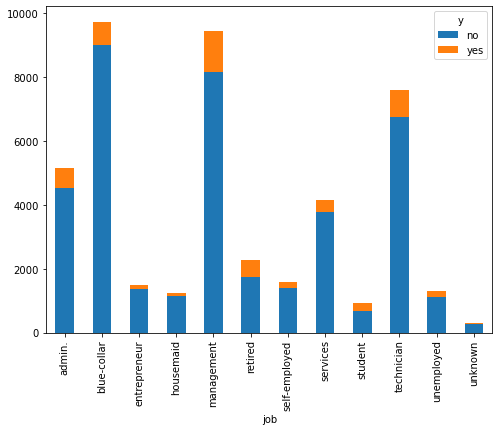

In [39]:
# group by job to display bar chart
types = df.groupby("job")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<AxesSubplot:xlabel='education'>

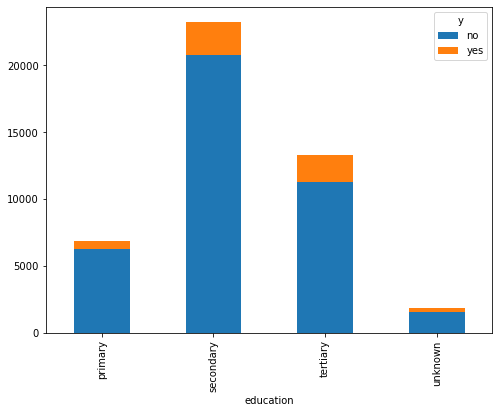

In [40]:
# group by job to display bar chart
types = df.groupby("education")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

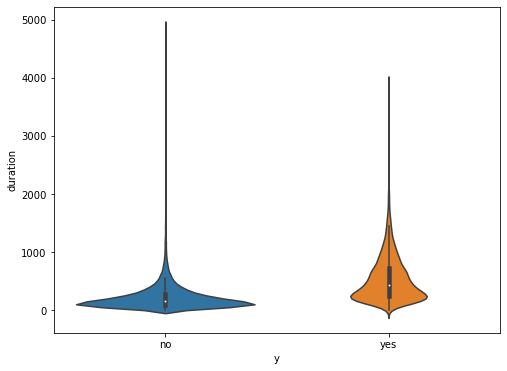

In [41]:
#violin plot for duration
sns.violinplot(x="y", y="duration", data=df, size=8)
plt.show()

In [42]:
correlacion = pd.DataFrame(df.corrwith(df['outcome']).sort_values())
correlacion.rename(columns={0: 'Correlacion con variable objetivo'}, inplace=True)
correlacion.drop(index='outcome',inplace=True)
correlacion

,Correlacion con variable objetivo
campaign,-0.073172
day,-0.028348
salary,0.020012
age_group,0.023382
age,0.025155
balance,0.052838
pcampaign,0.093236
pdays,0.103621
duration,0.394521


# Preprocessing

### One-hot encoding

In [43]:
df.drop(['duration','campaign','y'], axis =1, inplace=True)

In [135]:
df

,age,age_group,eligible,job,salary,marital,education,marital-education,tag,default,balance,housing,loan,contact,day,month,pdays,pcampaign,poutcome,outcome
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,2143,yes,no,unknown,5,may,-1,0,unknown,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,29,yes,no,unknown,5,may,-1,0,unknown,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,2,yes,yes,unknown,5,may,-1,0,unknown,0
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,1506,yes,no,unknown,5,may,-1,0,unknown,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,1,no,no,unknown,5,may,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,5,Y,technician,60000,married,tertiary,married-tertiary,yes,no,825,no,no,cellular,17,nov,-1,0,unknown,1
45207,71,7,N,retired,55000,divorced,primary,divorced-primary,yes,no,1729,no,no,cellular,17,nov,-1,0,unknown,1
45208,72,7,N,retired,55000,married,secondary,married-secondary,yes,no,5715,no,no,cellular,17,nov,184,3,success,1
45209,57,5,Y,blue-collar,20000,married,secondary,married-secondary,yes,no,668,no,no,telephone,17,nov,-1,0,unknown,0


The column pdays indicates how many days passed by after the client was last contacted from a previous campaign. -1 indicates the client was never contacted before, so we will create a new column with binary values indicating if the client was previously contacted or not

In [140]:
df.loc[df['pdays']>=0,'pdays'] = 1
df.loc[df['pdays']<0,'pdays'] = 0

In [44]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

,age,age_group,salary,balance,day,pdays,pcampaign,outcome,eligible_Y,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,5,100000,2143,5,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,4,60000,29,5,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,3,120000,2,5,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,4,20000,1506,5,-1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
4,33,3,0,1,5,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


### Normalization

The data will be Standarized
- Algorithms like KNN, Naive bayes, Logistic Regression and SVM require Standardised Data
- Tree based Algorithms are scale independant

In [45]:
temp_df = df_dummy['outcome']

In [46]:
df_dummy = df_dummy.drop('outcome',axis=1)

In [47]:
df_dummy['outcome'] = temp_df

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df_dummy.drop('outcome',axis=1))
scaled_features=scaler.transform(df_dummy.drop('outcome',axis=1))
df_stand=pd.DataFrame(scaled_features,columns=df_dummy.columns[:-1])
df_stand.head()

,age,age_group,salary,balance,day,pdays,pcampaign,eligible_Y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,1.25006,1.339983,0.256419,-1.298476,-0.411453,-0.25194,0.205447,-0.523740,-0.184415,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
1,0.288529,0.32692,0.093308,-0.437895,-1.298476,-0.411453,-0.25194,0.205447,-0.523740,-0.184415,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
2,-0.747384,-0.59622,1.963320,-0.446762,-1.298476,-0.411453,-0.25194,0.205447,-0.523740,5.422561,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
3,0.571051,0.32692,-1.153366,0.047205,-1.298476,-0.411453,-0.25194,0.205447,1.909346,-0.184415,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
4,-0.747384,-0.59622,-1.776703,-0.447091,-1.298476,-0.411453,-0.25194,0.205447,-0.523740,-0.184415,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519


In [49]:
df_stand['outcome'] = temp_df

In [50]:
df_stand[:]

,age,age_group,salary,balance,day,pdays,pcampaign,eligible_Y,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,outcome
0,1.606965,1.250060,1.339983,0.256419,-1.298476,-0.411453,-0.251940,0.205447,-0.523740,-0.184415,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,0
1,0.288529,0.326920,0.093308,-0.437895,-1.298476,-0.411453,-0.251940,0.205447,-0.523740,-0.184415,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,0
2,-0.747384,-0.596220,1.963320,-0.446762,-1.298476,-0.411453,-0.251940,0.205447,-0.523740,5.422561,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,0
3,0.571051,0.326920,-1.153366,0.047205,-1.298476,-0.411453,-0.251940,0.205447,1.909346,-0.184415,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,0
4,-0.747384,-0.596220,-1.776703,-0.447091,-1.298476,-0.411453,-0.251940,0.205447,-0.523740,-0.184415,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,1.250060,0.093308,-0.176460,0.143418,-0.411453,-0.251940,0.205447,-0.523740,-0.184415,...,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,1
45207,2.831227,3.096341,-0.062526,0.120447,0.143418,-0.411453,-0.251940,-4.867440,-0.523740,-0.184415,...,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,1
45208,2.925401,3.096341,-0.062526,1.429593,0.143418,1.436189,1.050473,-4.867440,-0.523740,-0.184415,...,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.205972,5.377848,-2.116316,1
45209,1.512791,1.250060,-1.153366,-0.228024,0.143418,-0.411453,-0.251940,0.205447,1.909346,-0.184415,...,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,0


# Resampling

In [152]:
df_stand.groupby(['outcome']).agg({'age':'count'}).rename(columns={'age':'amount'})

,amount
outcome,
0,39922
1,5289


Data highly imbalanced

In [145]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 

## Undersampling

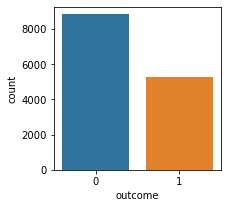

In [153]:
# instantiating over and under sampler
under = RandomUnderSampler(sampling_strategy=0.6)
# first performing oversampling to minority class
# X_over, y_over = over.fit_resample(X, y)
# now to comine under sampling 
# X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
# print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")
X, y = under.fit_resample(df_stand.loc[:,df_stand.columns != 'outcome'], df_stand['outcome'])
df_under_1 = pd.DataFrame(X)
df_under_1['outcome']=y
plt.figure(figsize=(3,3))
sns.countplot(df_under_1['outcome']);

In [155]:
df_under_1

,age,age_group,salary,balance,day,pdays,pcampaign,eligible_Y,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,outcome
0,1.512791,1.250060,-0.062526,4.096166,-0.577529,-0.411453,-0.251940,0.205447,-0.523740,-0.184415,...,-0.366006,-0.103262,-0.661650,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,0
1,-0.088167,0.326920,1.339983,-0.252985,-0.096898,-0.411453,-0.251940,0.205447,-0.523740,-0.184415,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,0
2,-0.653211,-0.596220,-1.153366,-0.283201,0.503892,-0.411453,-0.251940,0.205447,1.909346,-0.184415,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,0
3,-0.747384,-0.596220,0.093308,-0.445449,0.023260,-0.411453,-0.251940,0.205447,-0.523740,-0.184415,...,2.732196,-0.103262,-0.661650,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,0
4,-1.218254,-1.519360,-0.218360,-0.230980,-0.817845,-0.411453,-0.251940,0.205447,-0.523740,-0.184415,...,-0.366006,-0.103262,-0.661650,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14099,3.019575,3.096341,-0.062526,0.488624,0.143418,-0.001976,3.221163,-4.867440,-0.523740,-0.184415,...,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.205972,-0.185948,-2.116316,1
14100,-1.500776,-1.519360,0.093308,-0.281559,0.143418,-0.411453,-0.251940,0.205447,-0.523740,-0.184415,...,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,1
14101,0.947747,1.250060,0.093308,-0.176460,0.143418,-0.411453,-0.251940,0.205447,-0.523740,-0.184415,...,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,1
14102,2.831227,3.096341,-0.062526,0.120447,0.143418,-0.411453,-0.251940,-4.867440,-0.523740,-0.184415,...,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,1


## Oversampling

## Oversampling all data using SMOTE

In [52]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE

C:\Users\Nico\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


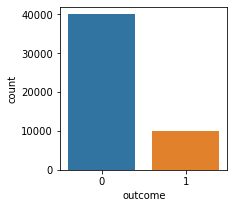

In [53]:
#Oversampling the data 4:1
smote = SMOTE(random_state=1, sampling_strategy=0.25)
X, y = smote.fit_resample(df_stand.loc[:,df_stand.columns != 'outcome'], df_stand['outcome'])
df_over_1 = pd.DataFrame(X)
df_over_1['outcome']=y
plt.figure(figsize=(3,3))
sns.countplot(df_over_1['outcome']);

C:\Users\Nico\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


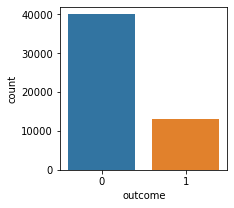

In [54]:
#Oversampling the data 3:1
smote = SMOTE(random_state=1, sampling_strategy=0.33)
X, y = smote.fit_resample(df_stand.loc[:,df_stand.columns != 'outcome'], df_stand['outcome'])
df_over_2 = pd.DataFrame(X)
df_over_2['outcome']=y
plt.figure(figsize=(3,3))
sns.countplot(df_over_2['outcome']);

C:\Users\Nico\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


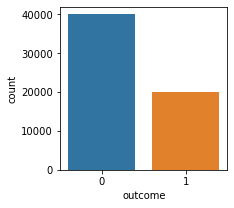

In [55]:
#Oversampling the data 3:1
smote = SMOTE(random_state=1, sampling_strategy=0.5)
X, y = smote.fit_resample(df_stand.loc[:,df_stand.columns != 'outcome'], df_stand['outcome'])
df_over_3 = pd.DataFrame(X)
df_over_3['outcome']=y
plt.figure(figsize=(3,3))
sns.countplot(df_over_3['outcome']);

The new dataframes where the SMOTE oversampling technique was applied are:
- df_over_1 with a ratio on the outcome variable of 4:1
- df_over_2 with a ratio on the outcome variable of 3:1
- df_over_3 with a ratio on the outcome variable of 2:1
- df_under_1 with 14000 rows (originally 41000)

# Machine Learning 

The way we proced is: 
1) In the Preprocessing stage the data was normalized. 
2) SMOTE was applied. Three new datasets where created following the ratio for the outcome variable as 4:1, 3:1 and 2:1
3) Random Forest 1 applied to each dataset


IN PROGRESS

## Importing Libraries for ML

In [94]:
# Importing required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as skm
from sklearn.metrics import plot_roc_curve
from xgboost import XGBClassifier

## Slicing Data

In [154]:
#Spliting entry from target
X1 = df_over_1.drop('outcome', axis=1) 
y1 = df_over_1['outcome'] 

X2 = df_over_2.drop('outcome', axis=1) 
y2 = df_over_2['outcome'] 

X3 = df_over_3.drop('outcome', axis=1) 
y3 = df_over_3['outcome']

X4 = df_under_1.drop('outcome', axis=1) 
y4 = df_under_1['outcome'] 


## Random Forest 1

### 1) RF 1 - df_over_1 - SMOTE 4:1

In [58]:
# 30% Data is set aside for tesing
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.30, random_state=1)

rf1_1 = RandomForestClassifier(max_depth = 4 ,random_state=1, n_estimators=200,
                               class_weight="balanced", max_features="log2")

#Fitting the model
rf1_1.fit(X_train,y_train)

y_train_prf = rf1_1.predict(X_train) #Train prediction
y_test_prf = rf1_1.predict(X_test) #Test prediction

#Recall in Train
train_recall = skm.recall_score(y_train, y_train_prf)
#Recall in Test
test_recall = skm.recall_score(y_test, y_test_prf)

print('% of correct positive predictions according to the truth in training set:', train_recall)
print('% of correct positive predictions according to the truth in test set:',test_recall)

#f1 in Train
train_f1 = skm.f1_score(y_train, y_train_prf)
#f1 in Test
test_f1 = skm.f1_score(y_test, y_test_prf)

print('Indicator of incorrect predictions in training set:', train_f1)
print('Indicator of incorrect predictions in testing set:',test_f1)

roc_auc = roc_auc_score(y_test, y_test_prf)
print('Logistic ROC AUC %.3f' % roc_auc)

% of correct positive predictions according to the truth in training set: 0.6213026166097838
% of correct positive predictions according to the truth in test set: 0.621438263229308
Indicator of incorrect predictions in training set: 0.5144539299381807
Indicator of incorrect predictions in testing set: 0.5194952502481214
Logistic ROC AUC 0.716


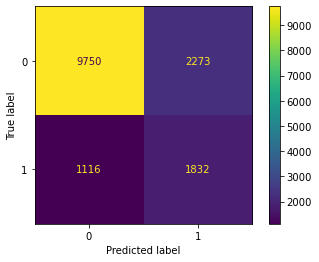

In [59]:
skm.plot_confusion_matrix(rf1_1, X_test, y_test)

### 2)  RF 1 - df_over_2 - SMOTE 3:1

### 3)  RF 1 - df_over_3 - SMOTE 2:1

In [ ]:
# 30% Data is set aside for tesing
X_train, X_test, y_train, y_test = train_test_split(X3,y3,test_size=0.30, random_state=1)

rf1_3 = RandomForestClassifier(max_depth = 4 ,random_state=1, n_estimators=200,
                               class_weight="balanced", max_features="log2")

#Fitting the model
rf1_3.fit(X_train,y_train)

y_train_prf = rf1_3.predict(X_train) #Train prediction
y_test_prf = rf1_3.predict(X_test) #Test prediction

#Recall in Train
train_recall = skm.recall_score(y_train, y_train_prf)
#Recall in Test
test_recall = skm.recall_score(y_test, y_test_prf)

print('% of correct positive predictions according to the truth in training set:', train_recall)
print('% of correct positive predictions according to the truth in test set:',test_recall)

#f1 in Train
train_f1 = skm.f1_score(y_train, y_train_prf)
#f1 in Test
test_f1 = skm.f1_score(y_test, y_test_prf)

print('Indicator of incorrect predictions in training set:', train_f1)
print('Indicator of incorrect predictions in testing set:',test_f1)

roc_auc = roc_auc_score(y_test, y_test_prf)
print('Logistic ROC AUC %.3f' % roc_auc)

% of correct positive predictions according to the truth in training set: 0.6757862990090479
% of correct positive predictions according to the truth in test set: 0.6748071979434447
Indicator of incorrect predictions in training set: 0.5731774164078202
Indicator of incorrect predictions in testing set: 0.5719577296001742
Logistic ROC AUC 0.727


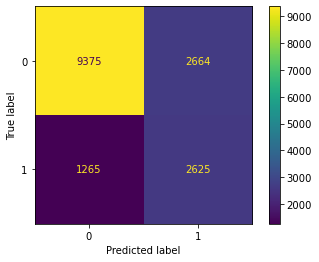

In [ ]:
skm.plot_confusion_matrix(rf1_3, X_test, y_test)

In [60]:
# 30% Data is set aside for tesing
X_train, X_test, y_train, y_test = train_test_split(X3,y3,test_size=0.30, random_state=1)

rf1_3 = RandomForestClassifier(max_depth = 4 ,random_state=1, n_estimators=200,
                               class_weight="balanced", max_features="log2")

#Fitting the model
rf1_3.fit(X_train,y_train)

y_train_prf = rf1_3.predict(X_train) #Train prediction
y_test_prf = rf1_3.predict(X_test) #Test prediction

#Recall in Train
train_recall = skm.recall_score(y_train, y_train_prf)
#Recall in Test
test_recall = skm.recall_score(y_test, y_test_prf)

print('% of correct positive predictions according to the truth in training set:', train_recall)
print('% of correct positive predictions according to the truth in test set:',test_recall)

#f1 in Train
train_f1 = skm.f1_score(y_train, y_train_prf)
#f1 in Test
test_f1 = skm.f1_score(y_test, y_test_prf)

print('Indicator of incorrect predictions in training set:', train_f1)
print('Indicator of incorrect predictions in testing set:',test_f1)

roc_auc = roc_auc_score(y_test, y_test_prf)
print('Logistic ROC AUC %.3f' % roc_auc)

% of correct positive predictions according to the truth in training set: 0.6757862990090479
% of correct positive predictions according to the truth in test set: 0.6748071979434447
Indicator of incorrect predictions in training set: 0.5731774164078202
Indicator of incorrect predictions in testing set: 0.5719577296001742
Logistic ROC AUC 0.727


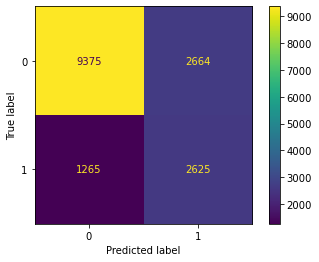

In [61]:
skm.plot_confusion_matrix(rf1_3, X_test, y_test)

### 4) RF 1 - df_under_1 - Undersampling

In [ ]:
# 30% Data is set aside for tesing
X_train, X_test, y_train, y_test = train_test_split(X4,y4,test_size=0.30, random_state=1)

rf1_4 = RandomForestClassifier(max_depth = 4 ,random_state=1, n_estimators=200,
                               class_weight="balanced", max_features="log2")

#Fitting the model
rf1_4.fit(X_train,y_train)

y_train_prf = rf1_4.predict(X_train) #Train prediction
y_test_prf = rf1_4.predict(X_test) #Test prediction

#Recall in Train
train_recall = skm.recall_score(y_train, y_train_prf)
#Recall in Test
test_recall = skm.recall_score(y_test, y_test_prf)

print('% of correct positive predictions according to the truth in training set:', train_recall)
print('% of correct positive predictions according to the truth in test set:',test_recall)

#f1 in Train
train_f1 = skm.f1_score(y_train, y_train_prf)
#f1 in Test
test_f1 = skm.f1_score(y_test, y_test_prf)

print('Indicator of incorrect predictions in training set:', train_f1)
print('Indicator of incorrect predictions in testing set:',test_f1)

roc_auc = roc_auc_score(y_test, y_test_prf)
print('Logistic ROC AUC %.3f' % roc_auc)

% of correct positive predictions according to the truth in training set: 0.7039133819262614
% of correct positive predictions according to the truth in test set: 0.7096054888507719
Indicator of incorrect predictions in training set: 0.6496424256277961
Indicator of incorrect predictions in testing set: 0.647114030971375
Logistic ROC AUC 0.739


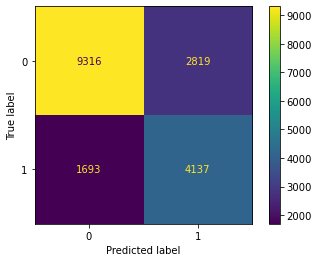

In [ ]:
skm.plot_confusion_matrix(rf1_4, X_test, y_test)

In [62]:
# 30% Data is set aside for tesing
X_train, X_test, y_train, y_test = train_test_split(X4,y4,test_size=0.30, random_state=1)

rf1_4 = RandomForestClassifier(max_depth = 4 ,random_state=1, n_estimators=200,
                               class_weight="balanced", max_features="log2")

#Fitting the model
rf1_4.fit(X_train,y_train)

y_train_prf = rf1_4.predict(X_train) #Train prediction
y_test_prf = rf1_4.predict(X_test) #Test prediction

#Recall in Train
train_recall = skm.recall_score(y_train, y_train_prf)
#Recall in Test
test_recall = skm.recall_score(y_test, y_test_prf)

print('% of correct positive predictions according to the truth in training set:', train_recall)
print('% of correct positive predictions according to the truth in test set:',test_recall)

#f1 in Train
train_f1 = skm.f1_score(y_train, y_train_prf)
#f1 in Test
test_f1 = skm.f1_score(y_test, y_test_prf)

print('Indicator of incorrect predictions in training set:', train_f1)
print('Indicator of incorrect predictions in testing set:',test_f1)

roc_auc = roc_auc_score(y_test, y_test_prf)
print('Logistic ROC AUC %.3f' % roc_auc)

% of correct positive predictions according to the truth in training set: 0.7039133819262614
% of correct positive predictions according to the truth in test set: 0.7096054888507719
Indicator of incorrect predictions in training set: 0.6496424256277961
Indicator of incorrect predictions in testing set: 0.647114030971375
Logistic ROC AUC 0.739


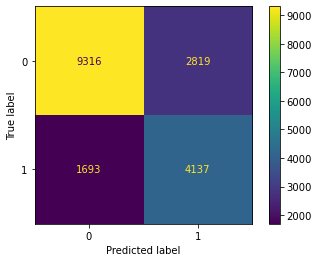

In [63]:
skm.plot_confusion_matrix(rf1_4, X_test, y_test)

### Random Forest 1 Feature Importance

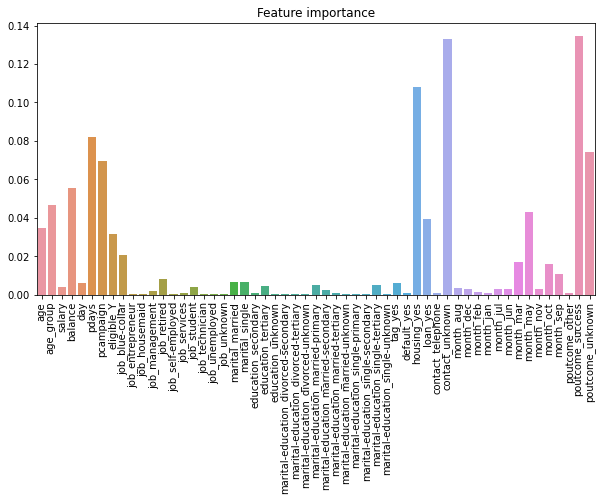

In [165]:
plt.figure(figsize=(10,5))
importances = rf1_1.feature_importances_
columns = X1.columns
sns.barplot(columns, importances)
plt.title('Feature importance')
plt.xticks(rotation = 90)
plt.show()

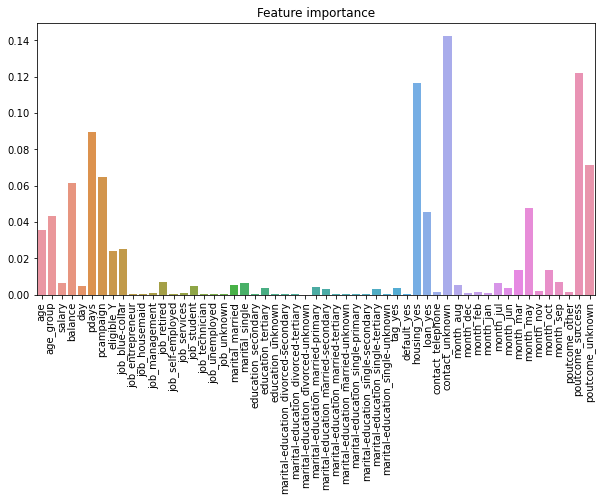

In [169]:
plt.figure(figsize=(10,5))
importances = rf1_2.feature_importances_
columns = X2.columns
sns.barplot(columns, importances)
plt.title('Feature importance')
plt.xticks(rotation = 90)
plt.show()

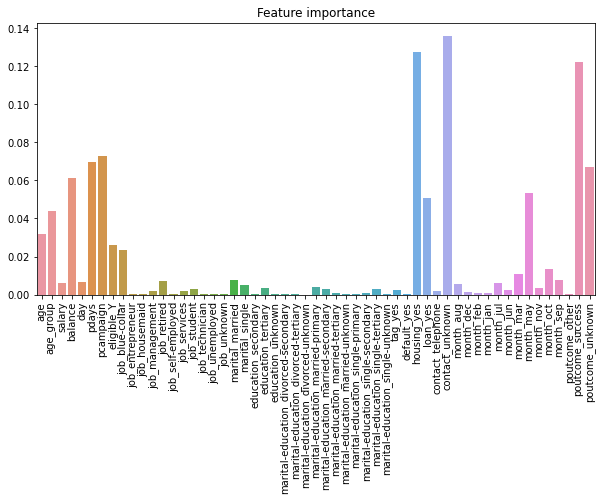

In [170]:
plt.figure(figsize=(10,5))
importances = rf1_3.feature_importances_
columns = X3.columns
sns.barplot(columns, importances)
plt.title('Feature importance')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
importances = rf1_4.feature_importances_
columns = X4.columns
sns.barplot(columns, importances)
plt.title('Feature importance')
plt.xticks(rotation = 90)
plt.show()

## Random Forest 2

### 1) RF 2 - df_over_1 - SMOTE 4:1

In [64]:
# 30% Data is set aside for tesing
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.30, random_state=1)

In [65]:
rf2_1 = RandomForestClassifier()

parameters={'bootstrap': [True,False],
            'max_features': ['auto','sqrt'],
            'min_samples_leaf': [1,2],
            'min_samples_split': [2,5],
            'n_estimators': [200,400]}

#bootstrap: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
#max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”. The number of features to consider when looking for the best split:
#min_samples_leafint or float, default=1, The minimum number of samples required to be at a leaf node. 
#min_samples_splitint or float, default=2. The minimum number of samples required to split an internal node
# n_estimatorsint, default=100. The number of trees in the forest.

In [66]:
clf=GridSearchCV(estimator = rf2_1, param_grid = parameters, scoring='accuracy', cv = 5, verbose = True)
best_clf = clf.fit(X_train,y_train)

#GridSearchCV
#cv: Determines the cross-validation splitting strategy. 5 is default
#verbose: Controls the verbosity, the higher, the more messages.
#param_grid: Dictionary with parameters names (str) as keys and lists of parameter settings to try as values

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix
# Training Random Forest
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classification report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accRF = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreRF = roc_auc_score(y_test,  y_pred_prob[:,1])
fprRF, tprRF, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for Random Forest is ",aucScoreRF)
print("Test Accuracy score for Random Forest is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for Random Forest is ",accuracy_score(y_train, predT))
print("Best parameters for Random Forest are ",best_clf.best_params_)

[[11698   325]
 [ 1245  1703]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94     12023
           1       0.84      0.58      0.68      2948

    accuracy                           0.90     14971
   macro avg       0.87      0.78      0.81     14971
weighted avg       0.89      0.90      0.89     14971

AUC score for Random Forest is  0.895651155276674
Test Accuracy score for Random Forest is  0.8951305857992118
Train Accuracy score for Random Forest is  0.9979960493544416
Best parameters for Random Forest are  {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [68]:
#Gridsearchcv Training Random Forest for recall
clfR=GridSearchCV(estimator = rf2_1, param_grid = parameters,scoring='recall', cv = 5, verbose = True)
best_clfR = clfR.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [69]:
predR=best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallRF=recall_score(y_test, predR)
print("Test Recall score for RF is ",recallRF)
print("Train recall score for RF is ",recall_score(y_train, predRT))
print("Best parameters for recall of RF are ",best_clfR.best_params_)

Test Recall score for RF is  0.5926051560379919
Train recall score for RF is  1.0
Best parameters for recall of RF are  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### 2) RF 2 - df_over_2 - SMOTE 3:1

In [70]:
# 30% Data is set aside for tesing
X_train, X_test, y_train, y_test = train_test_split(X2,y2,test_size=0.30, random_state=1)

In [71]:
rf2_2 = RandomForestClassifier()

parameters={'bootstrap': [True,False],
            'max_features': ['auto','sqrt'],
            'min_samples_leaf': [1,2],
            'min_samples_split': [2,5],
            'n_estimators': [200,400]}

#bootstrap: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
#max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”. The number of features to consider when looking for the best split:
#min_samples_leafint or float, default=1, The minimum number of samples required to be at a leaf node. 
#min_samples_splitint or float, default=2. The minimum number of samples required to split an internal node
# n_estimatorsint, default=100. The number of trees in the forest.

In [72]:
clf=GridSearchCV(estimator = rf2_2, param_grid = parameters, scoring='accuracy', cv = 5, verbose = True)
best_clf = clf.fit(X_train,y_train)

#GridSearchCV
#cv: Determines the cross-validation splitting strategy. 5 is default
#verbose: Controls the verbosity, the higher, the more messages.
#param_grid: Dictionary with parameters names (str) as keys and lists of parameter settings to try as values

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix
# Training Random Forest
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classification report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accRF = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreRF = roc_auc_score(y_test,  y_pred_prob[:,1])
fprRF, tprRF, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for Random Forest is ",aucScoreRF)
print("Test Accuracy score for Random Forest is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for Random Forest is ",accuracy_score(y_train, predT))
print("Best parameters for Random Forest are ",best_clf.best_params_)

[[11654   385]
 [ 1247  2643]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     12039
           1       0.87      0.68      0.76      3890

    accuracy                           0.90     15929
   macro avg       0.89      0.82      0.85     15929
weighted avg       0.90      0.90      0.89     15929

AUC score for Random Forest is  0.9279599869404725
Test Accuracy score for Random Forest is  0.8975453575240128
Train Accuracy score for Random Forest is  0.9981166088196518
Best parameters for Random Forest are  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 400}


In [74]:
#Gridsearchcv Training Random Forest for recall
clfR=GridSearchCV(estimator = rf2_2, param_grid = parameters,scoring='recall', cv = 5, verbose = True)
best_clfR = clfR.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [75]:
predR=best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallRF=recall_score(y_test, predR)
print("Test Recall score for RF is ",recallRF)
print("Train recall score for RF is ",recall_score(y_train, predRT))
print("Best parameters for recall of RF are ",best_clfR.best_params_)

Test Recall score for RF is  0.693573264781491
Train recall score for RF is  1.0
Best parameters for recall of RF are  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### 3) RF 2 - df_over_3 - SMOTE 2:1

In [76]:
# 30% Data is set aside for tesing
X_train, X_test, y_train, y_test = train_test_split(X3,y3,test_size=0.30, random_state=1)

In [77]:
rf2_3 = RandomForestClassifier()

parameters={'bootstrap': [True,False],
            'max_features': ['auto','sqrt'],
            'min_samples_leaf': [1,2],
            'min_samples_split': [2,5],
            'n_estimators': [200,400]}

#bootstrap: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
#max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”. The number of features to consider when looking for the best split:
#min_samples_leafint or float, default=1, The minimum number of samples required to be at a leaf node. 
#min_samples_splitint or float, default=2. The minimum number of samples required to split an internal node
# n_estimatorsint, default=100. The number of trees in the forest.

In [78]:
clf=GridSearchCV(estimator = rf2_3, param_grid = parameters, scoring='accuracy', cv = 5, verbose = True)
best_clf = clf.fit(X_train,y_train)

#GridSearchCV
#cv: Determines the cross-validation splitting strategy. 5 is default
#verbose: Controls the verbosity, the higher, the more messages.
#param_grid: Dictionary with parameters names (str) as keys and lists of parameter settings to try as values

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [79]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix
# Training Random Forest
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classification report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accRF = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreRF = roc_auc_score(y_test,  y_pred_prob[:,1])
fprRF, tprRF, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for Random Forest is ",aucScoreRF)
print("Test Accuracy score for Random Forest is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for Random Forest is ",accuracy_score(y_train, predT))
print("Best parameters for Random Forest are ",best_clf.best_params_)

[[11655   480]
 [ 1147  4683]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     12135
           1       0.91      0.80      0.85      5830

    accuracy                           0.91     17965
   macro avg       0.91      0.88      0.89     17965
weighted avg       0.91      0.91      0.91     17965

AUC score for Random Forest is  0.9557957257581765
Test Accuracy score for Random Forest is  0.9094350125243529
Train Accuracy score for Random Forest is  0.9987594827997519
Best parameters for Random Forest are  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 400}


In [80]:
#Gridsearchcv Training Random Forest for recall
clfR=GridSearchCV(estimator = rf2_3, param_grid = parameters,scoring='recall', cv = 5, verbose = True)
best_clfR = clfR.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [81]:
predR=best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallRF=recall_score(y_test, predR)
print("Test Recall score for RF is ",recallRF)
print("Train recall score for RF is ",recall_score(y_train, predRT))
print("Best parameters for recall of RF are ",best_clfR.best_params_)

Test Recall score for RF is  0.8149228130360205
Train recall score for RF is  1.0
Best parameters for recall of RF are  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


### 4) RF 2 - df_under_1 - Undersampling

In [ ]:
# 30% Data is set aside for tesing
X_train, X_test, y_train, y_test = train_test_split(X4,y4,test_size=0.30, random_state=1)

In [ ]:
rf2_4 = RandomForestClassifier()

parameters={'bootstrap': [True,False],
            'max_features': ['auto','sqrt'],
            'min_samples_leaf': [1,2],
            'min_samples_split': [2,5],
            'n_estimators': [200,400]}

#bootstrap: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
#max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”. The number of features to consider when looking for the best split:
#min_samples_leafint or float, default=1, The minimum number of samples required to be at a leaf node. 
#min_samples_splitint or float, default=2. The minimum number of samples required to split an internal node
# n_estimatorsint, default=100. The number of trees in the forest.

In [ ]:
clf=GridSearchCV(estimator = rf2_4, param_grid = parameters, scoring='accuracy', cv = 5, verbose = True)
best_clf = clf.fit(X_train,y_train)

#GridSearchCV
#cv: Determines the cross-validation splitting strategy. 5 is default
#verbose: Controls the verbosity, the higher, the more messages.
#param_grid: Dictionary with parameters names (str) as keys and lists of parameter settings to try as values

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix
# Training Random Forest
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classification report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accRF = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreRF = roc_auc_score(y_test,  y_pred_prob[:,1])
fprRF, tprRF, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for Random Forest is ",aucScoreRF)
print("Test Accuracy score for Random Forest is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for Random Forest is ",accuracy_score(y_train, predT))
print("Best parameters for Random Forest are ",best_clf.best_params_)

[[11655   480]
 [ 1147  4683]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     12135
           1       0.91      0.80      0.85      5830

    accuracy                           0.91     17965
   macro avg       0.91      0.88      0.89     17965
weighted avg       0.91      0.91      0.91     17965

AUC score for Random Forest is  0.9557957257581765
Test Accuracy score for Random Forest is  0.9094350125243529
Train Accuracy score for Random Forest is  0.9987594827997519
Best parameters for Random Forest are  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 400}


In [ ]:
#Gridsearchcv Training Random Forest for recall
clfR=GridSearchCV(estimator = rf2_4, param_grid = parameters,scoring='recall', cv = 5, verbose = True)
best_clfR = clfR.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [ ]:
predR=best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallRF=recall_score(y_test, predR)
print("Test Recall score for RF is ",recallRF)
print("Train recall score for RF is ",recall_score(y_train, predRT))
print("Best parameters for recall of RF are ",best_clfR.best_params_)

Test Recall score for RF is  0.8149228130360205
Train recall score for RF is  1.0
Best parameters for recall of RF are  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


## SVM

### 1) SMOTE 2:1. To perform SVM we will proceed to drop some columns.

In [83]:
#Option 1: Raw columns. The following columns are going to be drop because they are highly correlated with other variables
df1 = df_over_3.drop(['default_yes','poutcome_other',
       'poutcome_success', 'poutcome_unknown','month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep','age_group','eligible_Y','marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown',
       'marital-education_divorced-secondary',
       'marital-education_divorced-tertiary',
       'marital-education_divorced-unknown',
       'marital-education_married-primary',
       'marital-education_married-secondary',
       'marital-education_married-tertiary',
       'marital-education_married-unknown', 'marital-education_single-primary',
       'marital-education_single-secondary',
       'marital-education_single-tertiary', 'marital-education_single-unknown', 'tag_yes', 'contact_telephone', 'contact_unknown', 'day','month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep'], axis =1)

In [84]:
X = df1.drop(columns = 'outcome')
y = df1['outcome']

X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    train_size   = 0.7,
                                                    random_state = 1,
                                                    shuffle      = True
                                                    )

In [85]:
svm_2_1 = SVC(C = 100, kernel = 'linear', random_state=1)
svm_2_1.fit(X_train, y_train)

SVC(C=100, kernel='linear', random_state=1)

In [86]:
#Predicciones!
y_train_pred = svm_2_1.predict(X_train)
y_test_pred = svm_2_1.predict(X_test)

In [87]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',train_accuracy)
print('% de aciertos sobre el set de test:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.6712867980342574
% de aciertos sobre el set de test: 0.6842749791260785


In [89]:
#f1 in Train
train_f1 = skm.f1_score(y_test, y_test_pred)

#f1 in Test
test_f1 = skm.f1_score(y_test, y_test_pred)

print('Indicator of incorrect predictions in training set:', train_f1)
print('Indicator of incorrect predictions in testing set:',test_f1)

Indicator of incorrect predictions in training set: 0.23845327604726102
Indicator of incorrect predictions in testing set: 0.23845327604726102


### 2) Undersampled. To perform SVM we will proceed to drop some columns.

In [ ]:
#Option 1: Raw columns. The following columns are going to be drop because they are highly correlated with other variables
df1 = df_under_1.drop(['default_yes','poutcome_other',
       'poutcome_success', 'poutcome_unknown','month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep','age_group','eligible_Y','marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown',
       'marital-education_divorced-secondary',
       'marital-education_divorced-tertiary',
       'marital-education_divorced-unknown',
       'marital-education_married-primary',
       'marital-education_married-secondary',
       'marital-education_married-tertiary',
       'marital-education_married-unknown', 'marital-education_single-primary',
       'marital-education_single-secondary',
       'marital-education_single-tertiary', 'marital-education_single-unknown', 'tag_yes', 'contact_telephone', 'contact_unknown', 'day','month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep'], axis =1)

In [ ]:
X = df1.drop(columns = 'outcome')
y = df1['outcome']

X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    train_size   = 0.7,
                                                    random_state = 1,
                                                    shuffle      = True
                                                    )

In [ ]:
svm_under = SVC(C = 100, kernel = 'linear', random_state=1)
svm_under.fit(X_train, y_train)

SVC(C=100, kernel='linear', random_state=1)

In [ ]:
#Predicciones!
y_train_pred = svm_under.predict(X_train)
y_test_pred = svm_under.predict(X_test)

In [ ]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',train_accuracy)
print('% de aciertos sobre el set de test:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.6712867980342574
% de aciertos sobre el set de test: 0.6842749791260785


In [ ]:
#f1 in Train
train_f1 = skm.f1_score(y_test, y_test_pred)

#f1 in Test
test_f1 = skm.f1_score(y_test, y_test_pred)

print('Indicator of incorrect predictions in training set:', train_f1)
print('Indicator of incorrect predictions in testing set:',test_f1)

Indicator of incorrect predictions in training set: 0.23845327604726102
Indicator of incorrect predictions in testing set: 0.23845327604726102


## XGBoost

### 1) XGBoost simple - SMOTE 4:1

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.30, random_state=1)

In [126]:
xgb_simple = XGBClassifier()
xgb_simple.fit(X_train, y_train,eval_metric='rmse')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [127]:
y_pred = xgb_simple.predict(X_test)
predictions = [round(value) for value in y_pred]

In [128]:
recall = recall_score(y_test, predictions)
print("Recall: %.2f%%" % (recall * 100.0))

Recall: 58.51%


### 2) XGBoost with multiple hyperparameters - SMOTE 4:1

In [110]:
# 30% Data is set aside for tesing
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.30, random_state=1)

In [111]:
params = {
            'eta': np.arange(0.1, 0.26, 0.05),
            'min_child_weight': np.arange(1, 5, 0.5).tolist(),
            'gamma': [5],
            'subsample': np.arange(0.5, 1.0, 0.11).tolist(),
            'colsample_bytree': np.arange(0.5, 1.0, 0.11).tolist()
        }

In [112]:
xgb_multiple_1 = XGBClassifier(objective = "binary:logistic")
skf = StratifiedKFold(n_splits=10, shuffle = True)
clf = GridSearchCV(xgb_multiple_1, param_grid = params, scoring = 'accuracy',cv = skf.split(X_train, y_train),verbose=True)
best_clf = clf.fit(X_train,y_train,eval_metric='rmse')

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


In [113]:
# Training XGBOOST
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accXGBOOST = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreXGBOOST = roc_auc_score(y_test,  y_pred_prob[:,1])
fprXGBOOST, tprXGBOOST, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for XGBOOST is ",aucScoreXGBOOST)
print("Test Accuracy score for XGBOOST is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for XGBOOST is ",accuracy_score(y_train, predT))
print("Best parameters for XGBOOST are ",best_clf.best_params_)

[[11780   243]
 [ 1245  1703]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12023
           1       0.88      0.58      0.70      2948

    accuracy                           0.90     14971
   macro avg       0.89      0.78      0.82     14971
weighted avg       0.90      0.90      0.89     14971

AUC score for XGBOOST is  0.8917102549150763
Test Accuracy score for XGBOOST is  0.9006078418275333
Train Accuracy score for XGBOOST is  0.9079041539034096
Best parameters for XGBOOST are  {'colsample_bytree': 0.83, 'eta': 0.25000000000000006, 'gamma': 5, 'min_child_weight': 1.5, 'subsample': 0.83}


In [114]:
#Gridsearchcv And Training XGBBOST for recall
clfR = GridSearchCV(xgb_multiple_1, param_grid = params, scoring = 'recall',cv = skf.split(X_train, y_train),verbose=True)
best_clfR = clfR.fit(X_train,y_train,eval_metric='rmse')

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


In [115]:
predR = best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallXGBOOST=recall_score(y_test, predR)
print("Test Recall score for XGBOOST is ",recallXGBOOST)
print("Train recall score for XGBOOST is ",recall_score(y_train, predRT))
print("Best parameters for recall of XGBOOST are ",best_clfR.best_params_)

Test Recall score for XGBOOST is  0.578697421981004
Train recall score for XGBOOST is  0.6003981797497155
Best parameters for recall of XGBOOST are  {'colsample_bytree': 0.94, 'eta': 0.25000000000000006, 'gamma': 5, 'min_child_weight': 2.0, 'subsample': 0.61}


### 3) XGBoost simple - Undersampling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X4,y4,test_size=0.30, random_state=1)

In [ ]:
xgb_simple_under = XGBClassifier()
xgb_simple_under.fit(X_train, y_train,eval_metric='rmse')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_pred = xgb_simple_under.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
recall = recall_score(y_test, predictions)
print("Recall: %.2f%%" % (recall * 100.0))

Recall: 58.51%


### 4) XGBoost with multiple hyperparameters - Undersampling

In [ ]:
# 30% Data is set aside for tesing
X_train, X_test, y_train, y_test = train_test_split(X4,y4,test_size=0.30, random_state=1)

In [ ]:
params = {
            'eta': np.arange(0.1, 0.26, 0.05),
            'min_child_weight': np.arange(1, 5, 0.5).tolist(),
            'gamma': [5],
            'subsample': np.arange(0.5, 1.0, 0.11).tolist(),
            'colsample_bytree': np.arange(0.5, 1.0, 0.11).tolist()
        }

In [ ]:
xgb_multiple_under = XGBClassifier(objective = "binary:logistic")
skf = StratifiedKFold(n_splits=10, shuffle = True)
clf = GridSearchCV(xgb_multiple_under, param_grid = params, scoring = 'accuracy',cv = skf.split(X_train, y_train),verbose=True)
best_clf = clf.fit(X_train,y_train,eval_metric='rmse')

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


In [ ]:
# Training XGBOOST
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accXGBOOST = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreXGBOOST = roc_auc_score(y_test,  y_pred_prob[:,1])
fprXGBOOST, tprXGBOOST, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for XGBOOST is ",aucScoreXGBOOST)
print("Test Accuracy score for XGBOOST is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for XGBOOST is ",accuracy_score(y_train, predT))
print("Best parameters for XGBOOST are ",best_clf.best_params_)

[[11780   243]
 [ 1245  1703]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12023
           1       0.88      0.58      0.70      2948

    accuracy                           0.90     14971
   macro avg       0.89      0.78      0.82     14971
weighted avg       0.90      0.90      0.89     14971

AUC score for XGBOOST is  0.8917102549150763
Test Accuracy score for XGBOOST is  0.9006078418275333
Train Accuracy score for XGBOOST is  0.9079041539034096
Best parameters for XGBOOST are  {'colsample_bytree': 0.83, 'eta': 0.25000000000000006, 'gamma': 5, 'min_child_weight': 1.5, 'subsample': 0.83}


In [ ]:
#Gridsearchcv And Training XGBBOST for recall
clfR = GridSearchCV(xgb_multiple_under, param_grid = params, scoring = 'recall',cv = skf.split(X_train, y_train),verbose=True)
best_clfR = clfR.fit(X_train,y_train,eval_metric='rmse')

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


In [ ]:
predR = best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallXGBOOST=recall_score(y_test, predR)
print("Test Recall score for XGBOOST is ",recallXGBOOST)
print("Train recall score for XGBOOST is ",recall_score(y_train, predRT))
print("Best parameters for recall of XGBOOST are ",best_clfR.best_params_)

Test Recall score for XGBOOST is  0.578697421981004
Train recall score for XGBOOST is  0.6003981797497155
Best parameters for recall of XGBOOST are  {'colsample_bytree': 0.94, 'eta': 0.25000000000000006, 'gamma': 5, 'min_child_weight': 2.0, 'subsample': 0.61}


### XGBOOST Feature Importance

In [ ]:
#https://stackoverflow.com/questions/37627923/how-to-get-feature-importance-in-xgboost
best_clf = XGBClassifier(colsample_bytree= 0.94, eta= 0.25000000000000006, gamma= 5, min_child_weight= 1.5, subsample= 0.94,objective = "binary:logistic")
skf = StratifiedKFold(n_splits=10, shuffle = True)
best_clf.fit(X_train,y_train)

# HAY QUE REVISARLO, NO LLEGUE A VERLO EN DETALLE

[19:08:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.94,
              enable_categorical=False, eta=0.25000000000000006, gamma=5,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=1.5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.94, tree_method='exact',
              validate_parameters=1, verbosity=None)

<AxesSubplot:>

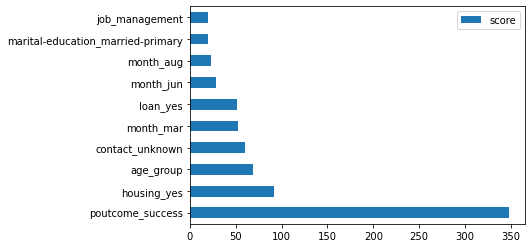

In [ ]:
#https://stackoverflow.com/questions/37627923/how-to-get-feature-importance-in-xgboost
    
feature_important = best_clf.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data[:10].plot(kind='barh')

# HAY QUE REVISARLO, NO LLEGUE A VERLO EN DETALLE

# ROC Cruve

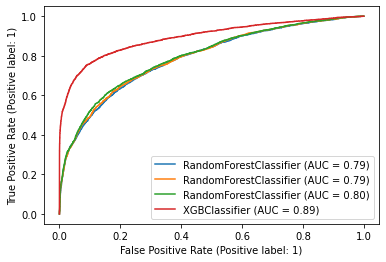

In [ ]:
disp = plot_roc_curve(rf1_1, X_test, y_test)
plot_roc_curve(rf1_2, X_test, y_test, ax=disp.ax_)
plot_roc_curve(rf1_3, X_test, y_test, ax=disp.ax_)
plot_roc_curve(rf1_4, X_test, y_test, ax=disp.ax_)
plot_roc_curve(rf1_1, X_test, y_test, ax=disp.ax_)
plot_roc_curve(rf2_2, X_test, y_test, ax=disp.ax_)
plot_roc_curve(rf2_3, X_test, y_test, ax=disp.ax_)
plot_roc_curve(rf2_4, X_test, y_test, ax=disp.ax_)
plot_roc_curve(xgb_simple, X_test, y_test, ax=disp.ax_)
plot_roc_curve(xgb_multiple_1, X_test, y_test, ax=disp.ax_)
plot_roc_curve(xgb_simple_under, X_test, y_test, ax=disp.ax_)
plot_roc_curve(xgb_multiple_under, X_test, y_test, ax=disp.ax_)
plot_roc_curve(svm_2_1, X_test, y_test, ax=disp.ax_)
plot_roc_curve(svm_under, X_test, y_test, ax=disp.ax_)